In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Copy of Task 2 - Sheet1.csv")

# Step 1: Analyze the Dataset

We First look at each column in the dataset:

  - Check Its type: Is it a number, a category, or text
  
  - Count missing values: How many entries are empty
  
  - Check for errors: Are there invalid values
  

In [16]:
# Look at the dataset structure
print(data.info())

# Count missing values and unique entries
for column in data.columns:
    print(f"{column}: Missing={data[column].isnull().sum()}, Unique={data[column].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   VIN                            100 non-null    object 
 1   TRANSACTION_ID                 100 non-null    int64  
 2   CORRECTION_VERBATIM            100 non-null    object 
 3   CUSTOMER_VERBATIM              100 non-null    object 
 4   REPAIR_DATE                    100 non-null    object 
 5   CAUSAL_PART_NM                 95 non-null     object 
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object 
 7   PLATFORM                       100 non-null    object 
 8   BODY_STYLE                     100 non-null    object 
 9   VPPC                           100 non-null    object 
 10  PLANT                          99 non-null     object 
 11  BUILD_COUNTRY                  100 non-null    object 
 12  LAST_KNOWN_DLR_NAME            100 non-null    obje

# Step 2: Clean the data

1. Handle Missing Values:
   
   - Numbers: REplace empty values with the median (middle value).
   
   - Categories : Replace missing value with "Unknown".
   
   
2. Fix Formatting Issued:

    - Convert cost columns (like TOTALCOST) to number after cleaning.
    
    - Make text columns lowercase fro consistency
    
3. Drop Useless Columns:

    - REmove columns like CAMPAIGN_NBR (it's completely empty)

In [17]:
# Drop useless columns
cleaned_data = data.drop(columns=["CAMPAIGN_NBR"])

# FIll Missing Values
categorical_columns = cleaned_data.select_dtypes(include="object").columns
numerical_columns = cleaned_data.select_dtypes(include=["int64","float64"]).columns

# fill categorical missing value with 'unknown'

cleaned_data[categorical_columns]=cleaned_data[categorical_columns].fillna("Unknown")

# fill numerical missing values with the median

for col in numerical_columns:
    cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].median())
    
    
# clean 'TPTALCOST' and convert to numeric
cleaned_data["TOTALCOST"] = pd.to_numeric(cleaned_data["TOTALCOST"].str.replace(",","").str.replace("$",""), errors='coerce')

# Step 3: FInd Important Columns

WE Pick 5 columns that are most important:

  1. REPAIR_AGE: Shows how old the vehicle is when repaired.
  
  2. TOTALCOST: Shows the cost of repairs.
  
  3. PLATFORM: Identifies the type of vehicle (e.g. , truck or car).
  
  4. BODY_STYLE: Tells us the design ( e.g. , sedan or SUV).
  
  5. COMPLAINT_CD: Describes the types of problems.
  
  

# Step 4: Create Visualizations


# 1. Repair Age Distribution:
   - Use a histogram to show how repairs are distributed over time.




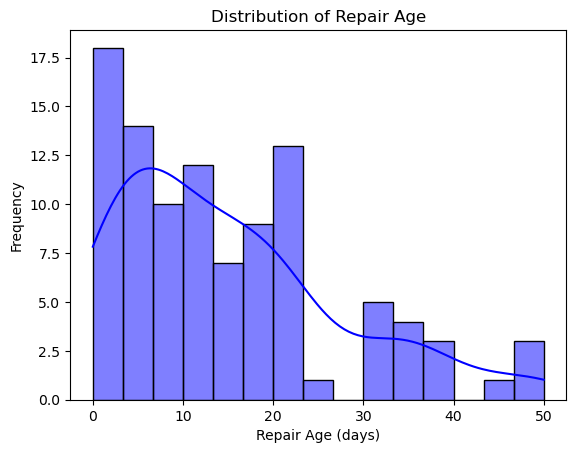

In [18]:
sns.histplot(cleaned_data["REPAIR_AGE"], bins=15, kde=True, color="blue")
plt.title("Distribution of Repair Age")
plt.xlabel("Repair Age (days)")
plt.ylabel("Frequency")
plt.show()

# 2. Most Common Repair Costs:
   
   - Use a bar chart to display frequent repair costs.
       

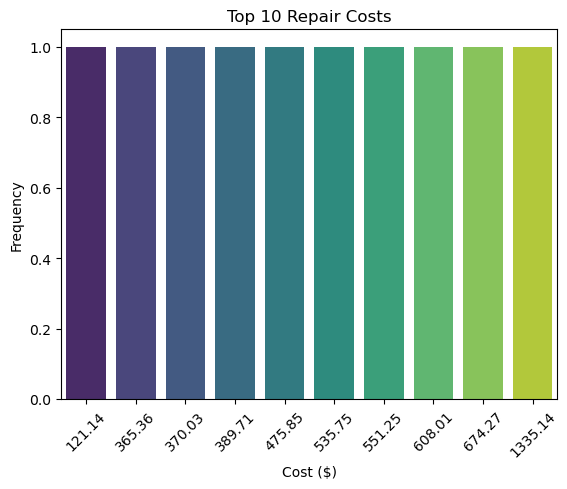

In [21]:
top_costs = cleaned_data["TOTALCOST"].dropna().value_counts().head(10)
sns.barplot(x=top_costs.index, y=top_costs.values, palette="viridis")
plt.title("Top 10 Repair Costs")
plt.xlabel("Cost ($)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# 3. Vehicle Platform Distribution:

      - Show how many repairs occur by vehicle type:
      

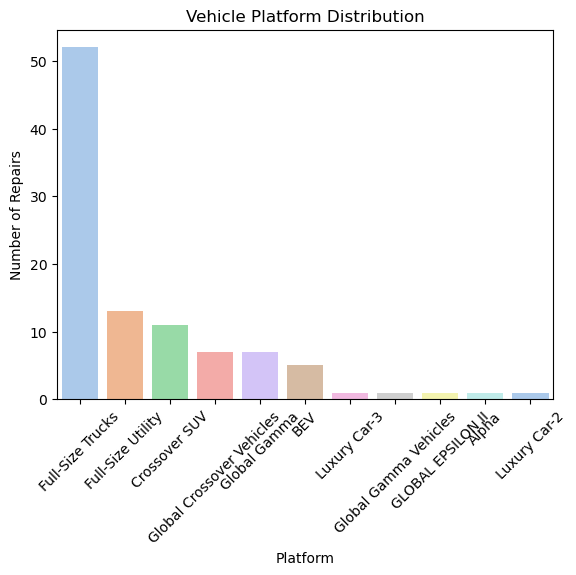

In [27]:
platform_counts = cleaned_data["PLATFORM"].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="pastel")
plt.title("Vehicle Platform Distribution")
plt.xlabel("Platform")
plt.ylabel("Number of Repairs")
plt.xticks(rotation=45)
plt.show()

# Generate Tags from Text

   - Extract common keywords from text fields like   CUSTOMER_VERBATIM.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract top 10 keywords from customer comments

vectorizer = CountVectorizer(stop_words="english", max_features=10)
word_matrix= vectorizer.fit_transform(cleaned_data["CUSTOMER_VERBATIM"])
keywords = vectorizer.get_feature_names_out()

print("Top  Keywords",keywords)

Top  Keywords ['advise' 'apart' 'check' 'coming' 'customer' 'heated' 'sop' 'states'
 'steering' 'wheel']


# Step 6: Write a Summary

                -Insights:
                   
                  - REpair Age: Most repairs occurs within a certain vehicle age, indicating wear-out patterns.
                  
                  - Total Cost: Some repairs are more frequent and expensiv, showing areas for optimization.
                  
                  - Platform: Certain vehicle types require more repairs.
                  
                  - Customer Verbatims: Keywords highlight common complaints, e.g., "steering","brakes".
                  
                  
                 - Recommendations:
                 
                   - Focus on vehicle at peak repair ages to improve service.
                   
                   - Reduce high-frequency repair costs by addressing root causes.
                   
                   - Investigate platforms with high repair counts to enhance design and manufacturing.
                   
                  

#  Deliverables:
     
     - Cleaned Dataset Save the cleaned dataset as a CSV file:
     

In [31]:
cleaned_data.to_csv("cleaned_task2_dataset.csv", index=False)